# Naive Bayes Classifier

# Step 1: Import Libraries

In [1]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 2: Define Constants and Helper Functions

In [2]:
# Define the percentage of the data to be used as the test set
TEST_SIZE = 0.2

def load_data(filename):
    """
    Load shopping activity data from a CSV file and convert it into a list of evidence and labels.
    
    Parameters:
    filename (str): The name of the CSV file to read.
    
    Returns:
    tuple: A tuple containing two lists:
        - evidence: A list of lists where each sublist contains features of a shopping session.
        - labels: A list of labels indicating whether revenue was generated (1) or not (0).
    """
    evidence = []
    labels = []

    # Dictionary to convert month names to integers
    month_index = {
        "Jan": 0, "Feb": 1, "Mar": 2, "Apr": 3, "May": 4, "June": 5,
        "Jul": 6, "Aug": 7, "Sep": 8, "Oct": 9, "Nov": 10, "Dec": 11
    }

    # Open the CSV file and read its contents
    with open(filename) as f:
        reader = csv.DictReader(f)

        # Iterate over each row in the CSV file
        for row in reader:
            # Extract evidence (features) from the current row
            evidence.append([
                int(row["Administrative"]),                     # Number of administrative pages visited
                float(row["Administrative_Duration"]),          # Total duration of administrative visits
                int(row["Informational"]),                      # Number of informational pages visited
                float(row["Informational_Duration"]),           # Total duration of informational visits
                int(row["ProductRelated"]),                     # Number of product-related pages visited
                float(row["ProductRelated_Duration"]),          # Total duration of product-related visits
                float(row["BounceRates"]),                      # Bounce rate
                float(row["ExitRates"]),                        # Exit rate
                float(row["PageValues"]),                       # Page values
                float(row["SpecialDay"]),                       # Special day indicator
                month_index[row["Month"]],                      # Month converted to an integer
                int(row["OperatingSystems"]),                   # Operating system used
                int(row["Browser"]),                            # Browser used
                int(row["Region"]),                             # Region of the visitor
                int(row["TrafficType"]),                        # Traffic type
                1 if row["VisitorType"] == "Returning_Visitor" else 0, # Visitor type: 1 if returning, 0 if new
                1 if row["Weekend"] == "TRUE" else 0            # Weekend indicator: 1 if true, 0 if false
            ])

            # Extract label from the current row
            labels.append(1 if row["Revenue"] == "TRUE" else 0)  # Revenue: 1 if true, 0 if false

    return evidence, labels

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Train a given Naive Bayes model and evaluate its performance on the test set.
    
    Parameters:
    model: The Naive Bayes model to be trained and evaluated.
    X_train: The training data (features).
    y_train: The training data (labels).
    X_test: The testing data (features).
    y_test: The testing data (labels).
    
    Returns:
    tuple: A tuple containing the accuracy score, classification report, and confusion matrix of the model.
    """
    # Train the model using the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)

    # Generate a classification report
    report = classification_report(y_test, predictions)

    # Generate a confusion matrix
    cm = confusion_matrix(y_test, predictions)

    return accuracy, report, cm

# Step 3: Load Data

In [3]:
# Load the shopping activity data from the CSV file
filename = 'activity_data.csv'
evidence, labels = load_data(filename)

# Step 4: Split Data into Training and Testing Sets


In [4]:
X_train, X_test, y_train, y_test = train_test_split(evidence, labels, test_size=TEST_SIZE)

# Step 5: Train and Evaluate the model

In [5]:
# Define a dictionary of Naive Bayes models to evaluate
models = {
    "GaussianNB": GaussianNB(),         # Gaussian Naive Bayes
    "BernoulliNB": BernoulliNB(),       # Bernoulli Naive Bayes
    "MultinomialNB": MultinomialNB(),   # Multinomial Naive Bayes
    "ComplementNB": ComplementNB()      # Complement Naive Bayes
}

# Lists to store accuracy scores and confusion matrices for each model
accuracies = []
confusion_matrices = []

# Iterate over each model, train it, and evaluate its performance
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Train the model and get its accuracy, classification report, and confusion matrix
    accuracy, report, cm = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)

    # Store the accuracy and confusion matrix
    accuracies.append((model_name, accuracy))
    confusion_matrices.append((model_name, cm))

    # Print the accuracy and classification report
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:\n")
    print(report)
    print("-" * 80)

Evaluating GaussianNB...
Accuracy: 84.51%

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2073
           1       0.51      0.53      0.52       393

    accuracy                           0.85      2466
   macro avg       0.71      0.72      0.72      2466
weighted avg       0.85      0.85      0.85      2466

--------------------------------------------------------------------------------
Evaluating BernoulliNB...
Accuracy: 85.69%

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      2073
           1       0.54      0.62      0.58       393

    accuracy                           0.86      2466
   macro avg       0.74      0.76      0.75      2466
weighted avg       0.87      0.86      0.86      2466

--------------------------------------------------------------------------------
Evaluating MultinomialNB...
Accuracy: 86.21%

Cla

# Step 6: Plotting the accuracies of different models


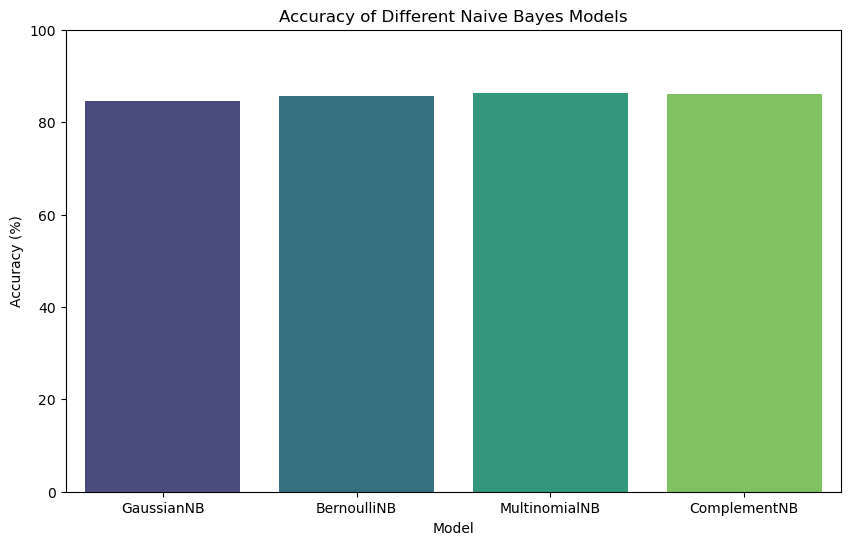

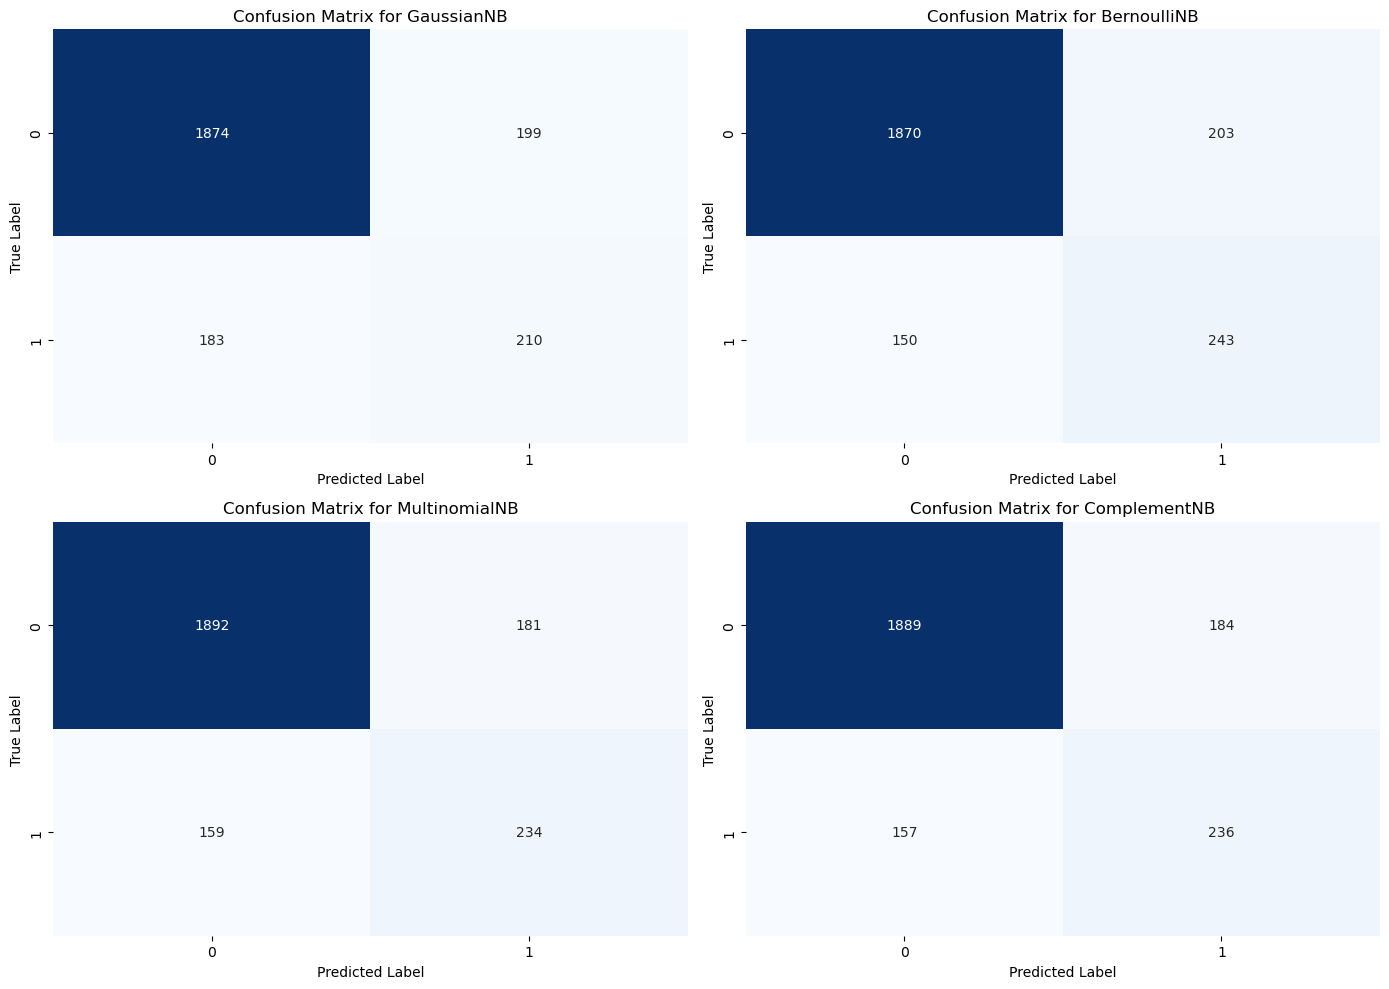

In [6]:
model_names = [name for name, _ in accuracies]
accuracy_values = [acc * 100 for _, acc in accuracies]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_values, palette="viridis")
plt.title("Accuracy of Different Naive Bayes Models")
plt.ylabel("Accuracy (%)")
plt.xlabel("Model")
plt.ylim(0, 100)
plt.show()

# Plotting the confusion matrices for each model
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, (model_name, cm) in zip(axes, confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(f"Confusion Matrix for {model_name}")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()